In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#some settings
sns.set_palette("Paired")

In [13]:
import datetime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Scaler & Classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [14]:
df_model = pd.read_csv('data/TransformedTelcoCustomerChurn.csv')

In [15]:
X = df_model.drop(columns = ['Churn'])
y = df_model['Churn'].copy()

In [16]:
# Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#gridSearch scoring, equal for all the classifier used foward
scores = {'f1_binary': make_scorer(f1_score, average='binary'),'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

Random Forest Classifier

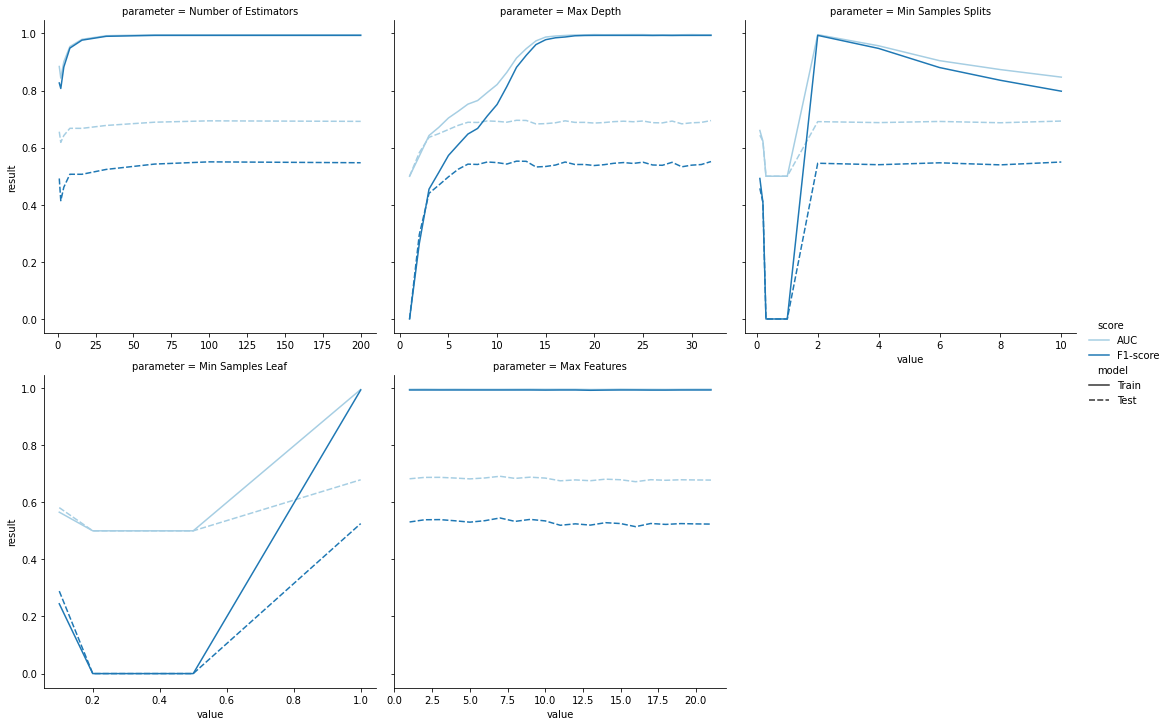

In [18]:
results = pd.DataFrame(columns=['parameter','value','model','score','result'])

#Number of estimators
parameters = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for parameter in parameters:
    model = RandomForestClassifier(n_estimators=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Max Depth
parameters = np.linspace(1, 32, 32, endpoint=True)
for parameter in parameters:
    model = RandomForestClassifier(max_depth=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

    
#Min Samples Splits
parameters = list(np.linspace(0.1, 1.0, 10, endpoint=True)) + [2,4,6,8,10]
for parameter in parameters:
    model = RandomForestClassifier(min_samples_split=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Min Samples Leaf
parameters = list(np.linspace(0.1, 0.5, 5, endpoint=True)) + [1]
for parameter in parameters:
    model = RandomForestClassifier(min_samples_leaf=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Max Features
parameters = list(range(1,X_train.shape[1]))
for parameter in parameters:
    model = RandomForestClassifier(max_features=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

results['value'] = results['value'].astype(float)
results['result'] = results['result'].astype(float)

#Display results
sns.relplot(data=results,x='value',y='result',hue='score',style='model',col='parameter',kind='line',facet_kws=dict(sharex=False), col_wrap=3)

Parameter range values for grid search:
- Number of estimators = [32,64,100]
- Max Depth = 10 overfiting for all of the values
- Min samples split = 2 (default)
- Min Samples Leaf = 1 (default)
- Max features - overfiting for all of the values

Gradient-Boosted Tree

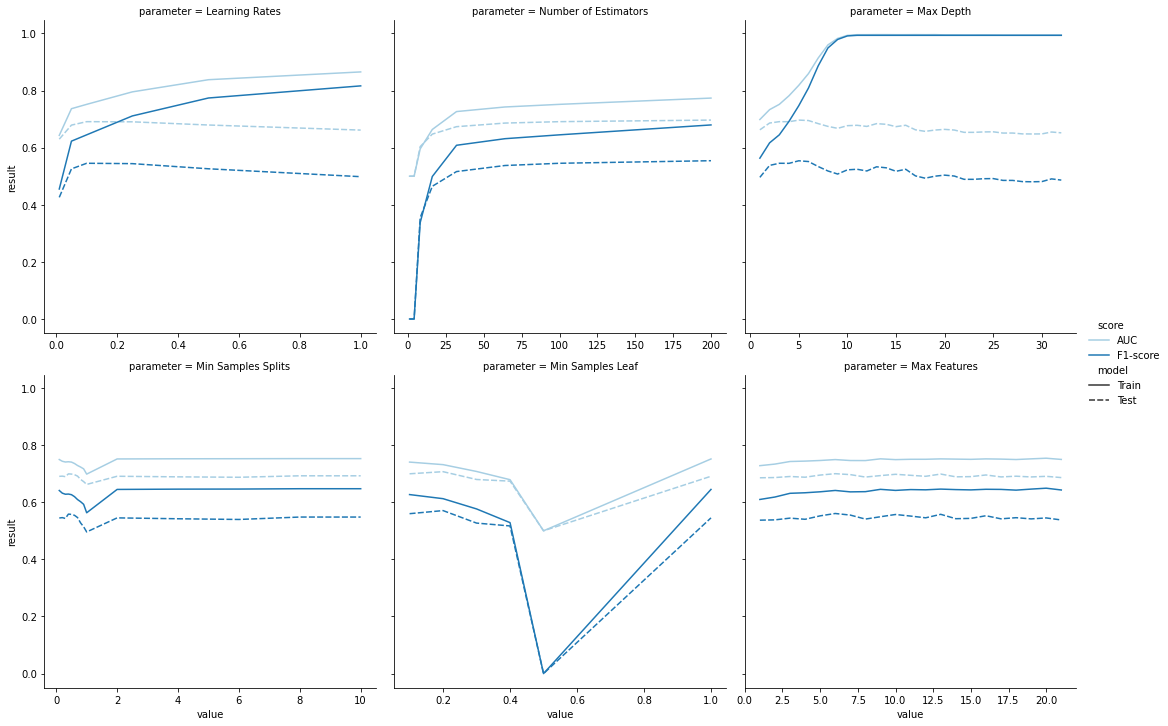

In [19]:
results = pd.DataFrame(columns=['parameter','value','model','score','result'])

#Learning Rates
parameters = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
for parameter in parameters:
    model = GradientBoostingClassifier(learning_rate=parameter)
    model.fit(X_train, y_train)
    #train data
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Learning Rates',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Learning Rates',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    #test data
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Learning Rates',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Learning Rates',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Number of estimators
parameters = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for parameter in parameters:
    model = GradientBoostingClassifier(n_estimators=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Number of Estimators',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Max Depth
parameters = np.linspace(1, 32, 32, endpoint=True)
for parameter in parameters:
    model = GradientBoostingClassifier(max_depth=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

    
#Min Samples Splits
parameters = list(np.linspace(0.1, 1.0, 10, endpoint=True)) + [2,4,6,8,10]
for parameter in parameters:
    model = GradientBoostingClassifier(min_samples_split=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Min Samples Leaf
parameters = list(np.linspace(0.1, 0.5, 5, endpoint=True)) + [1]
for parameter in parameters:
    model = GradientBoostingClassifier(min_samples_leaf=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Max Features
parameters = list(range(1,X_train.shape[1]))
for parameter in parameters:
    model = GradientBoostingClassifier(max_features=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

results['value'] = results['value'].astype(float)
results['result'] = results['result'].astype(float)

#Display results
sns.relplot(data=results,x='value',y='result',hue='score',style='model',col='parameter',kind='line',facet_kws=dict(sharex=False), col_wrap=3)

Parameter range values for grid search:
- Learnig rates = 0.1 (default)
- Number of estimators = [32,64,100]
- Max Depth = overfiting for all of the values
- Min samples split = 2 (default)
- Min Samples Leaf = 0.2
- Max features = overfiting for all of the values

Desicion Tree

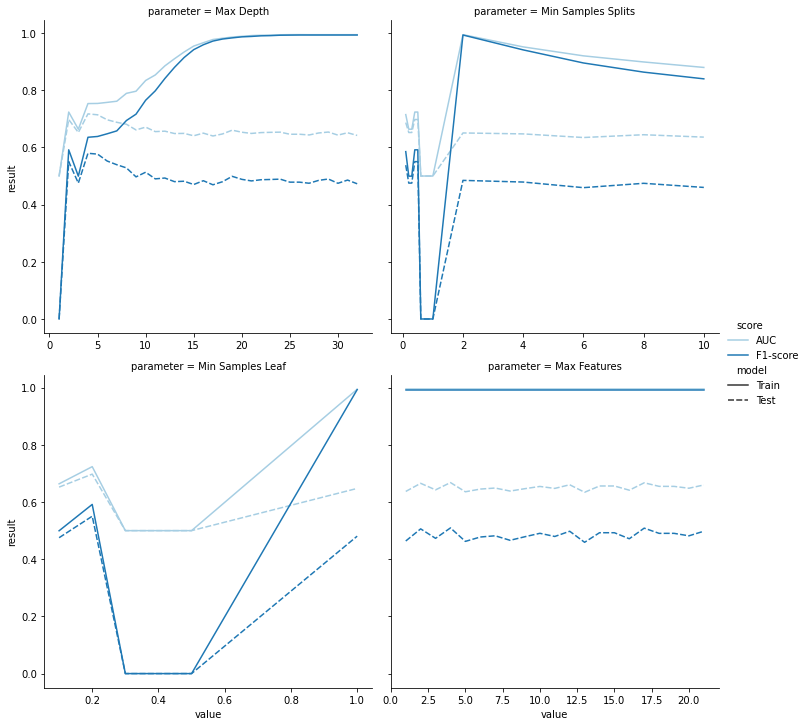

In [20]:
results = pd.DataFrame(columns=['parameter','value','model','score','result'])

#Max Depth
parameters = np.linspace(1, 32, 32, endpoint=True)
for parameter in parameters:
    model = DecisionTreeClassifier(max_depth=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Depth',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

    
#Min Samples Splits
parameters = list(np.linspace(0.1, 1.0, 10, endpoint=True)) + [2,4,6,8,10]
for parameter in parameters:
    model = DecisionTreeClassifier(min_samples_split=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Splits',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Min Samples Leaf
parameters = list(np.linspace(0.1, 0.5, 5, endpoint=True)) + [1]
for parameter in parameters:
    model = DecisionTreeClassifier(min_samples_leaf=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Min Samples Leaf',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Max Features
parameters = list(range(1,X_train.shape[1]))
for parameter in parameters:
    model = DecisionTreeClassifier(max_features=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Max Features',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

results['value'] = results['value'].astype(float)
results['result'] = results['result'].astype(float)

#Display results
sns.relplot(data=results,x='value',y='result',hue='score',style='model',col='parameter',kind='line',facet_kws=dict(sharex=False), col_wrap=2)

Parameter range values for grid search:
- Max Depth = [1,2,3,4,5,6,7,8]
- Min samples split = [0.1,0.2,0.3,0.4]
- Min Samples Leaf = 0.2
- Max features - overfiting for all of the values

K-Neighbor Classifier

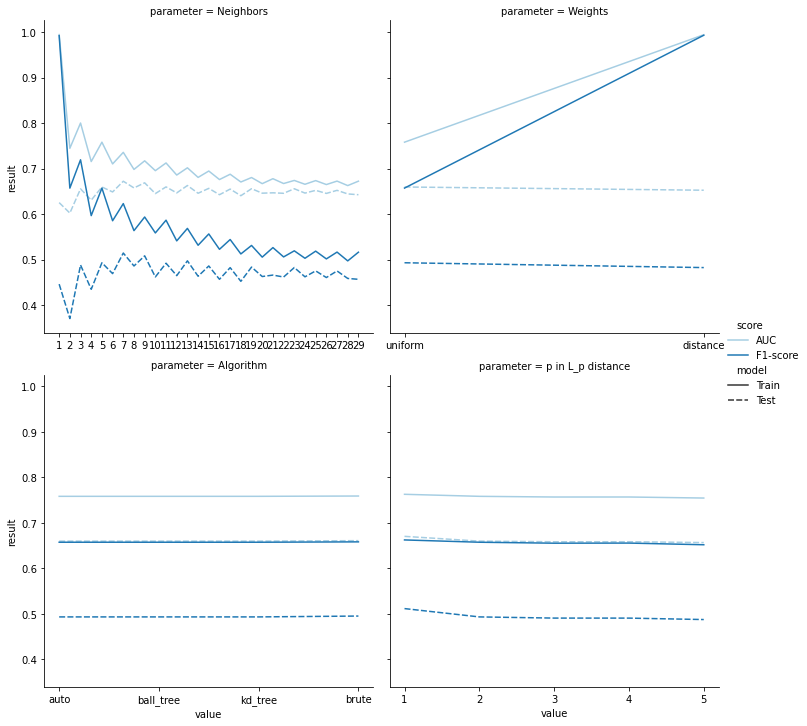

In [21]:
results = pd.DataFrame(columns=['parameter','value','model','score','result'])

#Neighbors
parameters = list(range(1,30))
for parameter in parameters:
    model = KNeighborsClassifier(n_neighbors=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Neighbors',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Neighbors',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Neighbors',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Neighbors',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Weights
parameters = ['uniform','distance']
for parameter in parameters:
    model = KNeighborsClassifier(weights=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Weights',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Weights',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Weights',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Weights',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
#Algorithm
parameters = ['auto','ball_tree','kd_tree','brute']
for parameter in parameters:
    model = KNeighborsClassifier(algorithm=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Algorithm',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Algorithm',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Algorithm',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Algorithm',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
       
#p in L_p distance
parameters = [1, 2, 3, 4, 5]
for parameter in parameters:
    model = KNeighborsClassifier(p=parameter)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['p in L_p distance',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['p in L_p distance',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['p in L_p distance',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['p in L_p distance',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))


results['result'] = results['result'].astype(float)

#Display results
sns.relplot(data=results,x='value',y='result',hue='score',style='model',col='parameter',kind='line',facet_kws=dict(sharex=False), col_wrap=2)

Parameter range values for grid search:
- neighbors = [4,5,6,7]
- weights = default
- algorithm = default
- p = 1

Logistic Regression

/Users/margaridacrespo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/margaridacrespo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


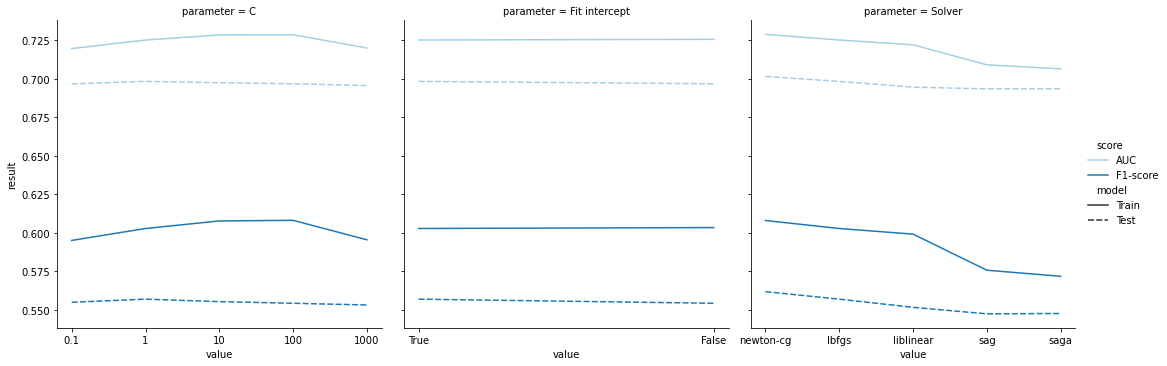

In [22]:
results = pd.DataFrame(columns=['parameter','value','model','score','result'])

#C
parameters = [0.1, 1, 10, 100, 1000]
for parameter in parameters:
    model = LogisticRegression(C=parameter,max_iter=1000)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['C',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['C',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['C',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['C',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
#fit_intercept
parameters = [True, False]
for parameter in parameters:
    model = LogisticRegression(fit_intercept=parameter,max_iter=1000)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Fit intercept',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Fit intercept',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Fit intercept',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Fit intercept',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

#Solver
parameters = ['newton-cg','lbfgs','liblinear','sag','saga']
for parameter in parameters:
    model = LogisticRegression(solver=parameter,max_iter=1000)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Solver',parameter,'Train','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Solver',parameter,'Train','F1-score',f1_score(y_train, train_pred, average='binary')]]),columns=['parameter','value','model','score','result']))
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    results = results.append(pd.DataFrame(np.array([['Solver',parameter,'Test','AUC',roc_auc]]),columns=['parameter','value','model','score','result']))
    results = results.append(pd.DataFrame(np.array([['Solver',parameter,'Test','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['parameter','value','model','score','result']))

results['result'] = results['result'].astype(float)

#Display results
sns.relplot(data=results,x='value',y='result',hue='score',style='model',col='parameter',kind='line',facet_kws=dict(sharex=False))

Parameter range values for grid search:
- C = 1 (default)
- Fit intercept = [True,False]
- Solver = ['newton-cg','lbfgs','liblinear']